# Laboratorio de regresión - 2

|                |   |
:----------------|---|
| **Nombre**     | Francisco Tinoco  |
| **Fecha**      |  02-02-2026  |
| **Expediente** |  746080  |

## Regresión polinomial

Observa la siguiente gráfica.

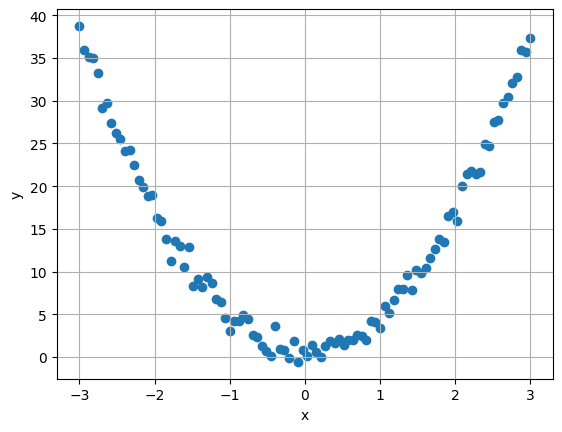

In [1]:
import matplotlib.pyplot as plt; import numpy as np
%matplotlib inline
np.random.seed(0)
x = np.linspace(-3, 3, 100); y = 1 + 4*x**2 + np.random.normal(0, 1, 100)
plt.figure(); plt.xlabel("x"); plt.ylabel("y")
plt.scatter(x, y); plt.grid()

Utiliza `sklearn` para realizar una regresión lineal simple ($\hat{y} = \hat{\beta_0} + \hat{\beta_1}x $)

In [ ]:
from sklearn.linear_model import LinearRegression

#Darle forma a x
X = x.reshape(-1, 1)

#Crear modelo lineal
modelo_lineal = LinearRegression()
modelo_lineal.fit(X, y)

LinearRegression()

In [3]:
print("Beta 0:", modelo_lineal.intercept_)
print("Beta 1:", modelo_lineal.coef_[0])

Beta 0: 13.30223225795873
Beta 1: -0.049554477435905686


Crea una gráfica donde se muestren las observaciones como una nube de puntos y la línea que ajustaste con regresión. Calcula el métrico $R^2$.

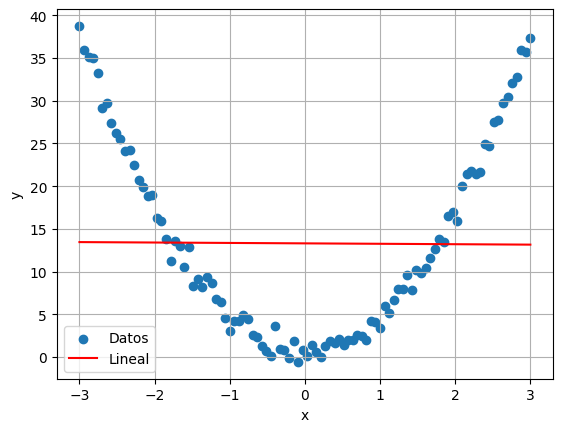

In [ ]:
#Predicciones
y_pred_lineal = modelo_lineal.predict(X)

#Grafica
plt.figure()
plt.scatter(x, y, label="Datos")
plt.plot(x, y_pred_lineal, color="red", label="Lineal")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()

In [5]:
r2_lineal = modelo_lineal.score(X, y)
print("R2 modelo lineal:", r2_lineal)

R2 modelo lineal: 5.80345273922811e-05


Podemos ver que el ajuste no es correcto, pues parece que tiene un comportamiento cuadrático y estamos intentando ajustar una línea recta.

En lugar de hacer una regresión lineal simple, quizás podamos extender el modelo para que tenga varios factores dentro:

$$ Y = \beta_0 + \beta_1 X + \beta_2 X^2 + ... + \beta_p X^p + \epsilon$$

Ajusta un modelo cuadrático con `sklearn` ($\hat{y} = \hat{\beta_0} + \hat{\beta_1}x + \hat{\beta_1}x^2 $) y calcula su $R^2$.

In [ ]:
#Crear X con x y x^2
X2 = np.column_stack((x, x**2))

#Modelo cuadratico
modelo_grado2 = LinearRegression()
modelo_grado2.fit(X2, y)

LinearRegression()

In [ ]:
print("Beta 0:", modelo_grado2.intercept_)
print("Beta 1:", modelo_grado2.coef_[0])
print("Beta 2:", modelo_grado2.coef_[1])

Beta 0: 0.6194209631804846
Beta 1: -0.04955447743590568
Beta 2: 4.143888838887942


In [ ]:
#R2
r2_grado2 = modelo_grado2.score(X2, y)
print("R2 modelo grado 2:", r2_grado2)

R2 modelo grado 2: 0.9934118040713642


Crea una gráfica con las observaciones y la nueva curva que ajustaste.

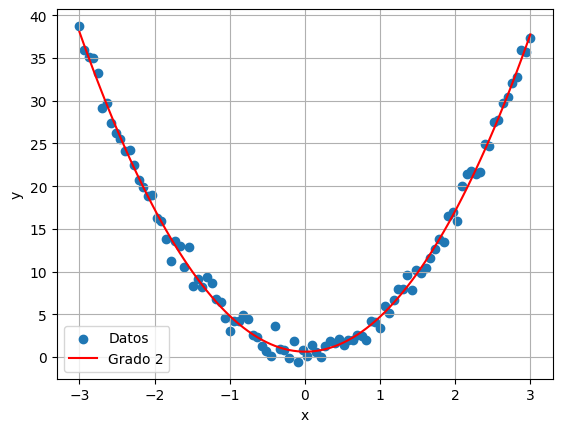

In [9]:
#Pred
y_pred_grado2 = modelo_grado2.predict(X2)

#Grafica
plt.figure()
plt.scatter(x, y, label="Datos")
plt.plot(x, y_pred_grado2, color="red", label="Grado 2")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()

Ajusta modelos de grados 3, 5, 7, 9, y 11. Calcula su $R^2$.

In [10]:
#Grado 3
X3 = np.column_stack((x, x**2, x**3))
modelo_grado3 = LinearRegression()
modelo_grado3.fit(X3, y)
r2_grado3 = modelo_grado3.score(X3, y)
print("R2 grado 3:", r2_grado3)

R2 grado 3: 0.9934129585186598


In [11]:
#Grado 5
X5 = np.column_stack((x, x**2, x**3, x**4, x**5))
modelo_grado5 = LinearRegression()
modelo_grado5.fit(X5, y)
r2_grado5 = modelo_grado5.score(X5, y)
print("R2 grado 5:", r2_grado5)

#Grado 7
X7 = np.column_stack((x, x**2, x**3, x**4, x**5, x**6, x**7))
modelo_grado7 = LinearRegression()
modelo_grado7.fit(X7, y)
r2_grado7 = modelo_grado7.score(X7, y)
print("R2 grado 7:", r2_grado7)

R2 grado 5: 0.9934954953676421
R2 grado 7: 0.9935089341876935


In [12]:
#Grado 9
X9 = np.column_stack((x, x**2, x**3, x**4, x**5, x**6, x**7, x**8, x**9))
modelo_grado9 = LinearRegression()
modelo_grado9.fit(X9, y)
r2_grado9 = modelo_grado9.score(X9, y)
print("R2 grado 9:", r2_grado9)

#Grado 11
X11 = np.column_stack((x, x**2, x**3, x**4, x**5, x**6, x**7, x**8, x**9, x**10, x**11))
modelo_grado11 = LinearRegression()
modelo_grado11.fit(X11, y)
r2_grado11 = modelo_grado11.score(X11, y)
print("R2 grado 11:", r2_grado11)

R2 grado 9: 0.9935141799662259
R2 grado 11: 0.9935338704150221


Crea una gráfica por cada modelo con las observaciones y su curva.

In [13]:
#Predicciones de cada modelo
y_pred3 = modelo_grado3.predict(X3)
y_pred5 = modelo_grado5.predict(X5)
y_pred7 = modelo_grado7.predict(X7)
y_pred9 = modelo_grado9.predict(X9)
y_pred11 = modelo_grado11.predict(X11)

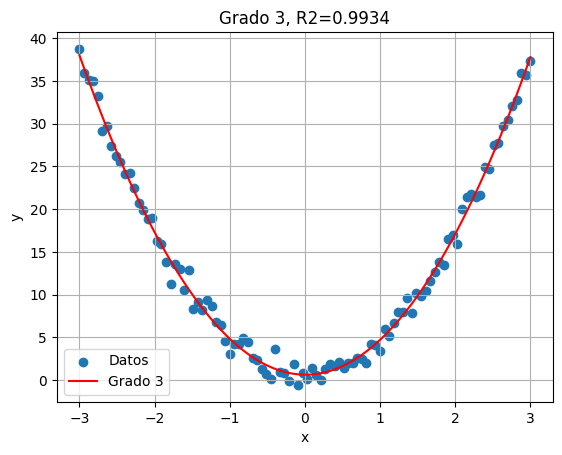

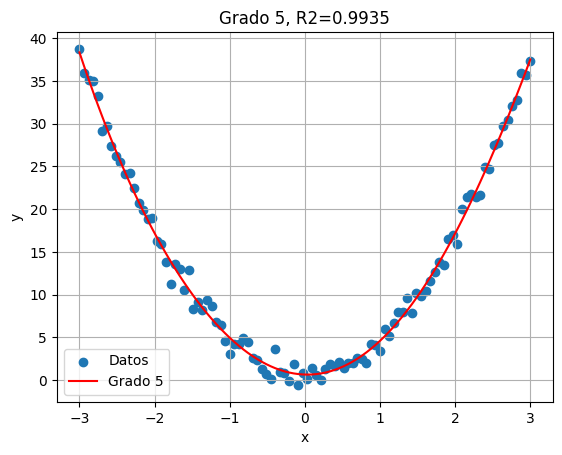

In [14]:
#Grafica grado 3
plt.figure()
plt.scatter(x, y, label="Datos")
plt.plot(x, y_pred3, color="red", label="Grado 3")
plt.xlabel("x"); plt.ylabel("y")
plt.legend(); plt.grid(); plt.title("Grado 3, R2=" + str(round(r2_grado3, 4)))
plt.show()

#Grafica grado 5
plt.figure()
plt.scatter(x, y, label="Datos")
plt.plot(x, y_pred5, color="red", label="Grado 5")
plt.xlabel("x"); plt.ylabel("y")
plt.legend(); plt.grid(); plt.title("Grado 5, R2=" + str(round(r2_grado5, 4)))
plt.show()

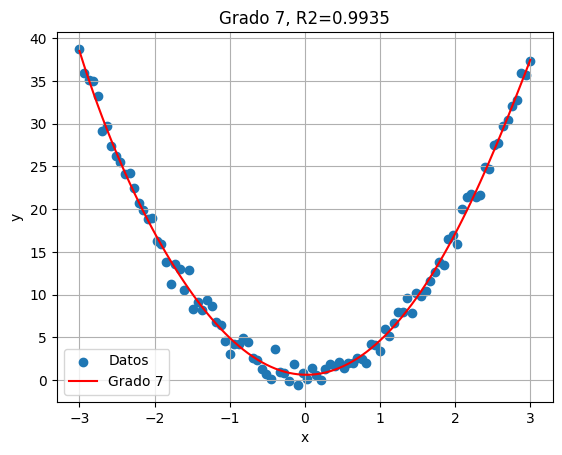

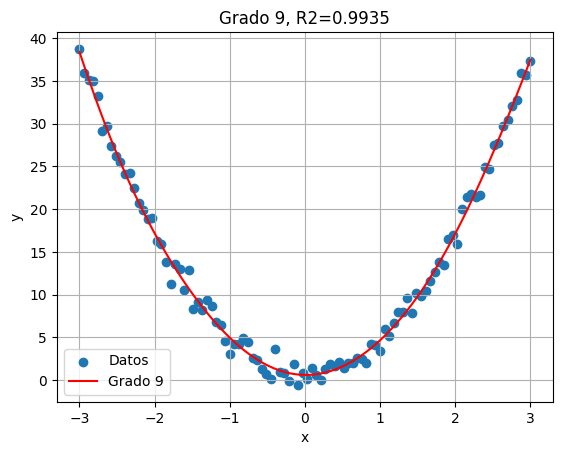

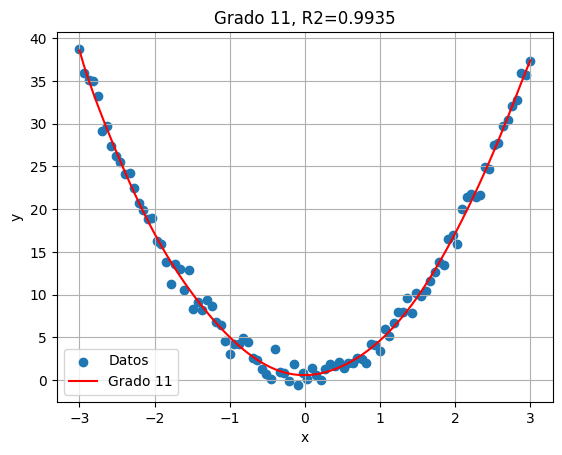

In [15]:
#Grafica grado 7
plt.figure()
plt.scatter(x, y, label="Datos")
plt.plot(x, y_pred7, color="red", label="Grado 7")
plt.xlabel("x"); plt.ylabel("y")
plt.legend(); plt.grid(); plt.title("Grado 7, R2=" + str(round(r2_grado7, 4)))
plt.show()

#grafica grado 9
plt.figure()
plt.scatter(x, y, label="Datos")
plt.plot(x, y_pred9, color="red", label="Grado 9")
plt.xlabel("x"); plt.ylabel("y")
plt.legend(); plt.grid(); plt.title("Grado 9, R2=" + str(round(r2_grado9, 4)))
plt.show()

#Grafica grado 11
plt.figure()
plt.scatter(x, y, label="Datos")
plt.plot(x, y_pred11, color="red", label="Grado 11")
plt.xlabel("x"); plt.ylabel("y")
plt.legend(); plt.grid(); plt.title("Grado 11, R2=" + str(round(r2_grado11, 4)))
plt.show()

**¿Cuál modelo consideras que es mejor? ¿Por qué?**

In [16]:
# Comparar todos los R2
print("R2 grado 2:", r2_grado2)
print("R2 grado 3:", r2_grado3)
print("R2 grado 5:", r2_grado5)
print("R2 grado 7:", r2_grado7)
print("R2 grado 9:", r2_grado9)
print("R2 grado 11:", r2_grado11)

R2 grado 2: 0.9934118040713642
R2 grado 3: 0.9934129585186598
R2 grado 5: 0.9934954953676421
R2 grado 7: 0.9935089341876935
R2 grado 9: 0.9935141799662259
R2 grado 11: 0.9935338704150221


El modelo de grado 2 es el mejor porque:
* 1. Los datos fueron generados con una funcion cuadratica (y = 1 + 4x^2)
 * 2. Tiene un R2 muy alto y similar a los demas
*  3. Es el mas simple (menos parametros)
* Los modelos de mayor grado pueden sobreajustar

Recuerda que una de las metas de ajustar modelos es para poder interpolar y extrapolar. Los datos que tenemos mantienen $x \in [-3, 3]$. ¿Qué pasaría si quisiéramos saber el valor de $y$ cuando $x=5$?

Calcula la predicción $\hat{y}$ para todos los modelos creados (grados 2, 3, 5, 7, 9, y 11).

In [20]:
# Valor real cuando x=5 seria: y = 1 + 4*(5)^2 = 1 + 100 = 101

In [18]:
#Pred grado 2
x_nuevo = 5
X_nuevo2 = np.array([[x_nuevo, x_nuevo**2]])
pred2 = modelo_grado2.predict(X_nuevo2)
print("Prediccion grado 2:", pred2[0])

#Pred grado 3
X_nuevo3 = np.array([[x_nuevo, x_nuevo**2, x_nuevo**3]])
pred3 = modelo_grado3.predict(X_nuevo3)
print("Prediccion grado 3:", pred3[0])

#Pred grado 5
X_nuevo5 = np.array([[x_nuevo, x_nuevo**2, x_nuevo**3, x_nuevo**4, x_nuevo**5]])
pred5 = modelo_grado5.predict(X_nuevo5)
print("Prediccion grado 5:", pred5[0])

Prediccion grado 2: 103.9688695481995
Prediccion grado 3: 104.25232438790758
Prediccion grado 5: 84.59895012673093


In [19]:
#Pred  grado 7
X_nuevo7 = np.array([[x_nuevo, x_nuevo**2, x_nuevo**3, x_nuevo**4, x_nuevo**5, x_nuevo**6, x_nuevo**7]])
pred7 = modelo_grado7.predict(X_nuevo7)
print("Prediccion grado 7:", pred7[0])

#Pred grado 9
X_nuevo9 = np.array([[x_nuevo, x_nuevo**2, x_nuevo**3, x_nuevo**4, x_nuevo**5, x_nuevo**6, x_nuevo**7, x_nuevo**8, x_nuevo**9]])
pred9 = modelo_grado9.predict(X_nuevo9)
print("Prediccion grado 9:", pred9[0])

#Pred grado 11
X_nuevo11 = np.array([[x_nuevo, x_nuevo**2, x_nuevo**3, x_nuevo**4, x_nuevo**5, x_nuevo**6, x_nuevo**7, x_nuevo**8, x_nuevo**9, x_nuevo**10, x_nuevo**11]])
pred11 = modelo_grado11.predict(X_nuevo11)
print("Prediccion grado 11:", pred11[0])

Prediccion grado 7: 33.74321847611175
Prediccion grado 9: 215.7363792635012
Prediccion grado 11: -5265.344253535167


¿Cuál modelo crees que sea mejor?

El modelo de grado 2 es el mejor para extrapolar porque:
- Da una prediccion cercana al valor real (101)
- Los modelos de mayor grado dan predicciones muy alejadas
- Esto pasa porque los modelos de grado alto sobreajustan los datos

## Referencia

James, G., Witten, D., Hastie, T., Tibshirani, R.,, Taylor, J. (2023). An Introduction to Statistical Learning with Applications in Python. Cham: Springer. ISBN: 978-3-031-38746-3